<a href="https://colab.research.google.com/github/Shrez7961/Linear-Regression-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
data = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Capstone Projects/Bike sharing Demand Prediction /Copy of SeoulBikeData.csv', encoding = 'unicode_escape')

In [130]:
#lets geet started with the introduction of data:data
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [132]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [133]:
data.shape

(8760, 14)

In [134]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


There are total 154 variables out of which 10 contains numerical data
Lets convert  other variables in numeric form or drop if not required

In [135]:
from datetime import datetime
import datetime as dt

In [136]:
#striping out day, month , year form date
data['Date'] = data['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [137]:
#adding seperate columns of day, month and year in dataset
data['day'] = data['Date'].dt.day_name()
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month


In [138]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,year,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017,12


[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

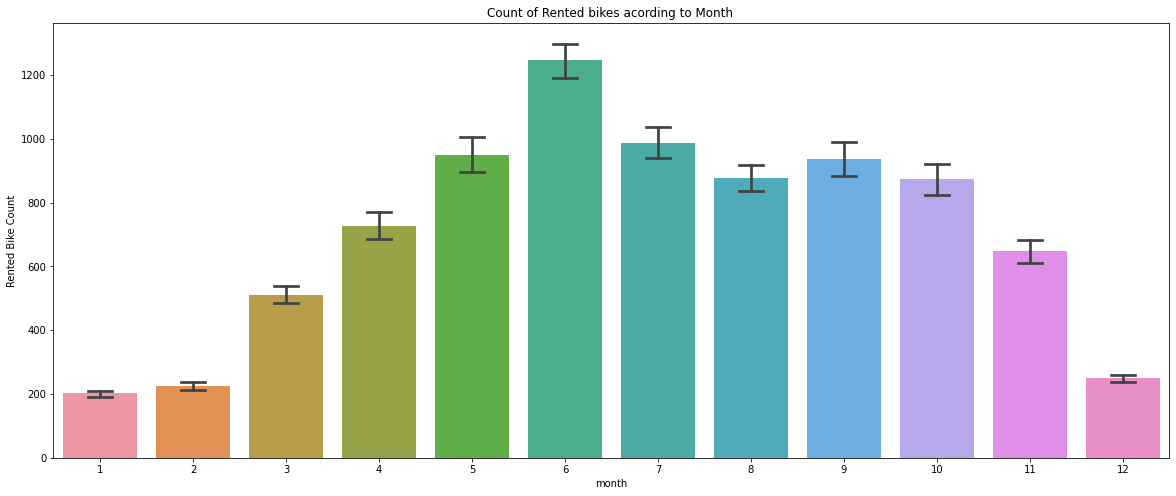

In [139]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='month',y='Rented Bike Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

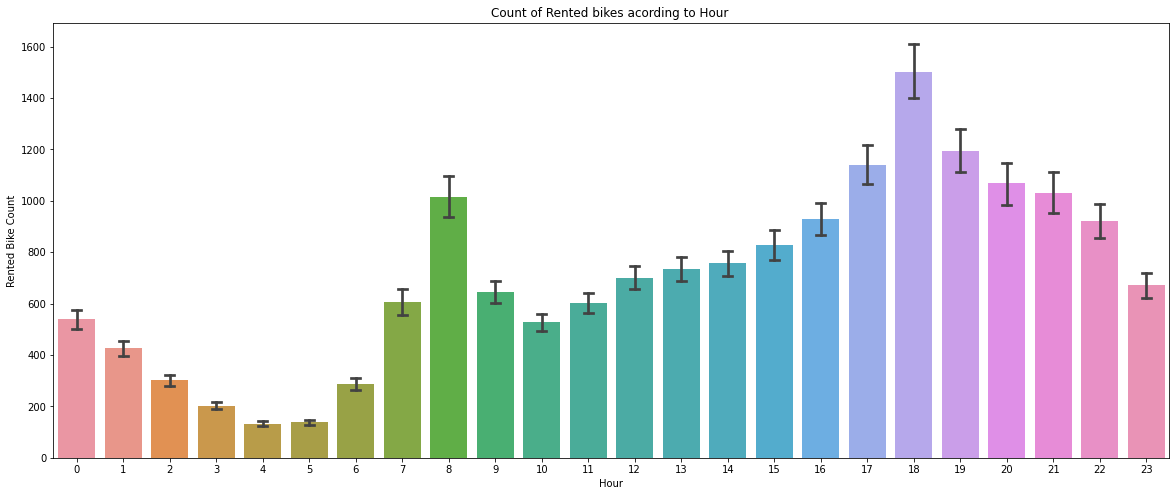

In [140]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

In [141]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

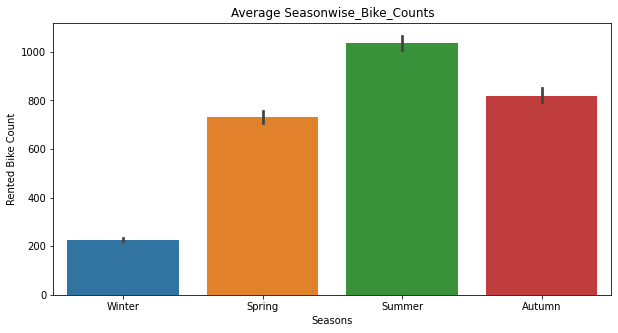

In [142]:
plt.figure(figsize = (10,5))
z = sns.barplot(y= 'Rented Bike Count', x= 'Seasons', data=data)
z.set_title('Average Seasonwise_Bike_Counts')
z.set_xlabel('Seasons')
z.set_ylabel("Rented Bike Count")
plt.show()

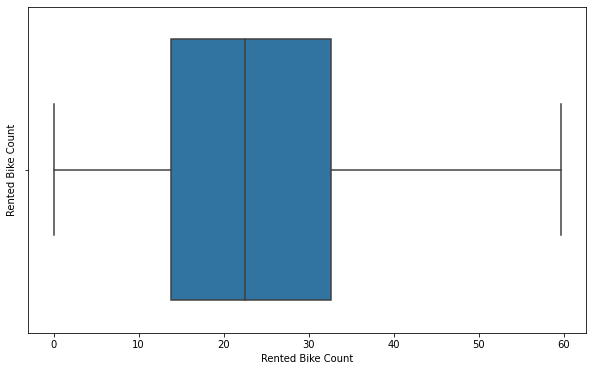

In [143]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(data['Rented Bike Count']))
plt.show()

In [144]:
numerical_columns=list(data.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year',
       'month'],
      dtype='object')

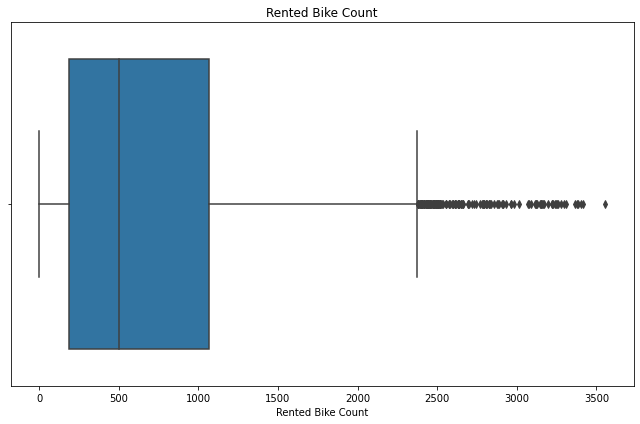

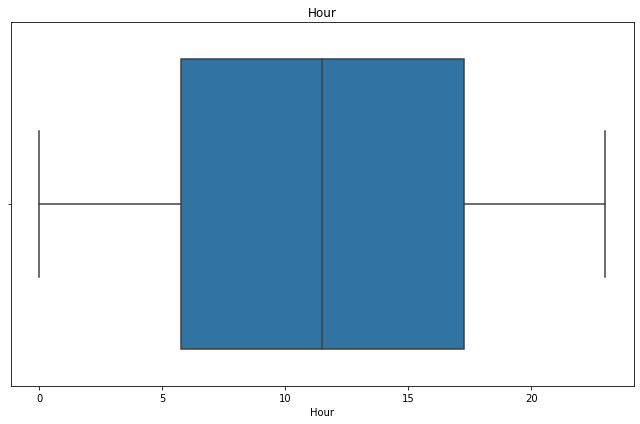

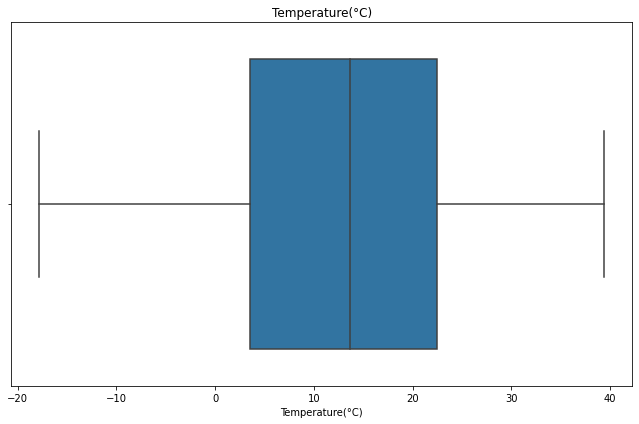

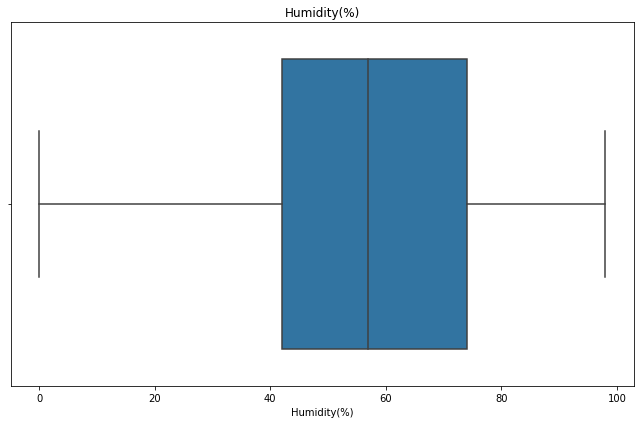

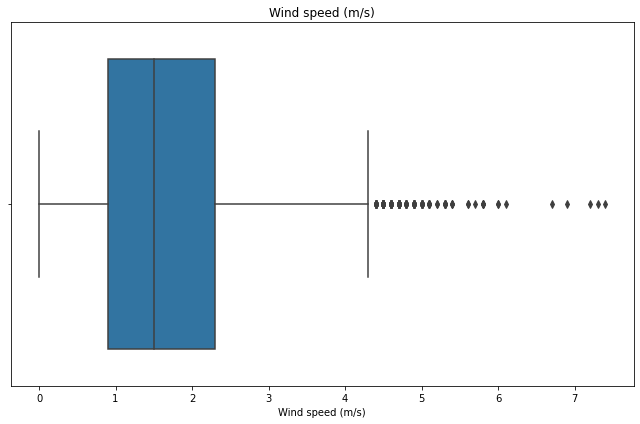

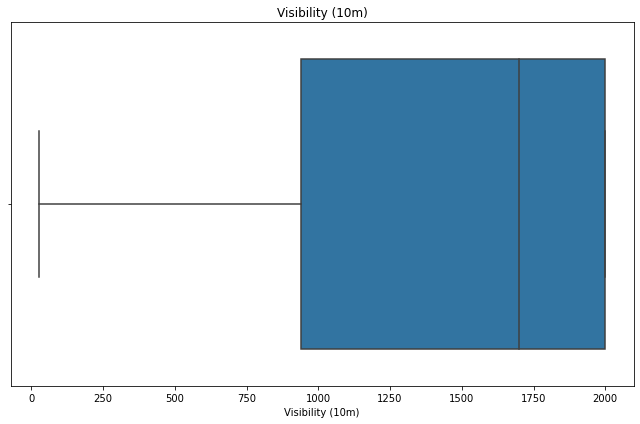

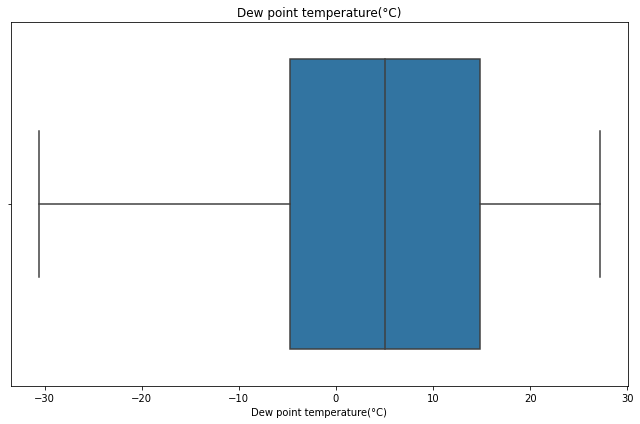

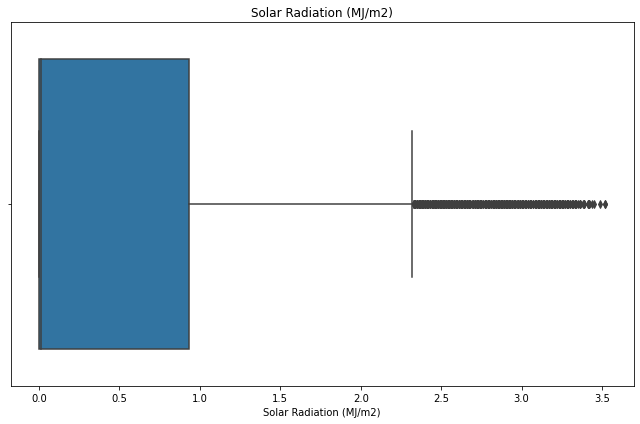

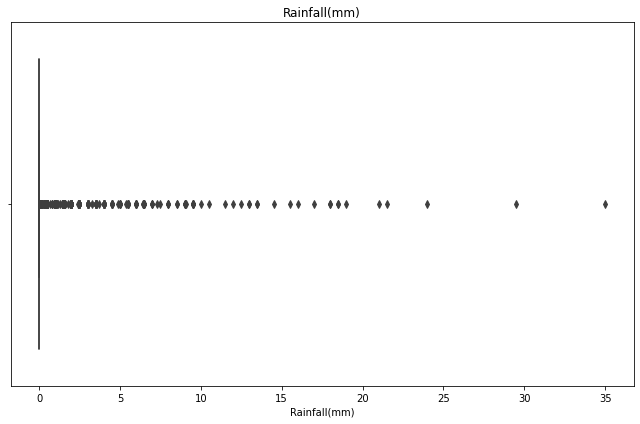

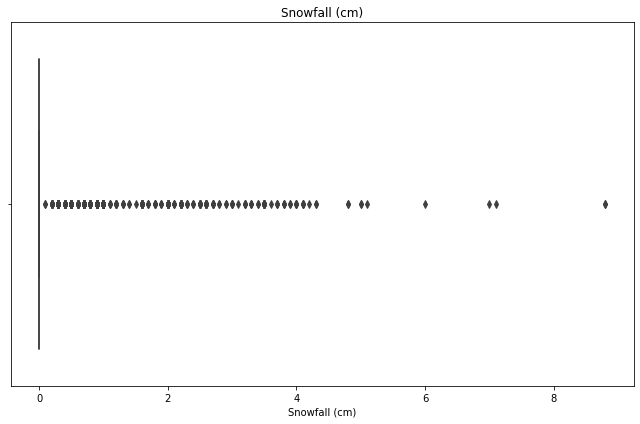

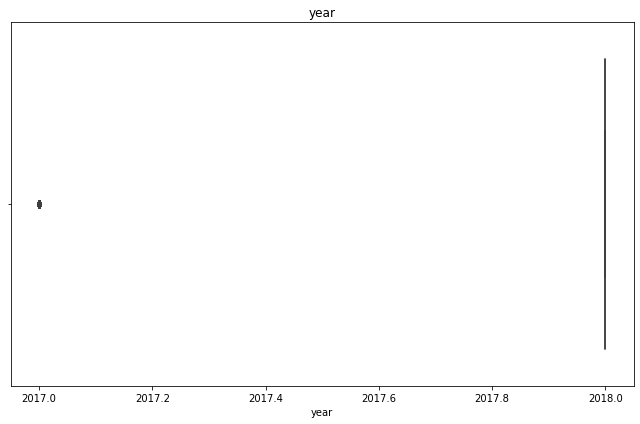

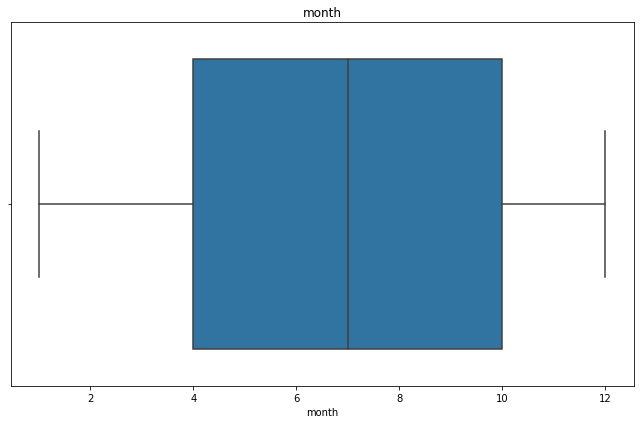

In [145]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=data[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

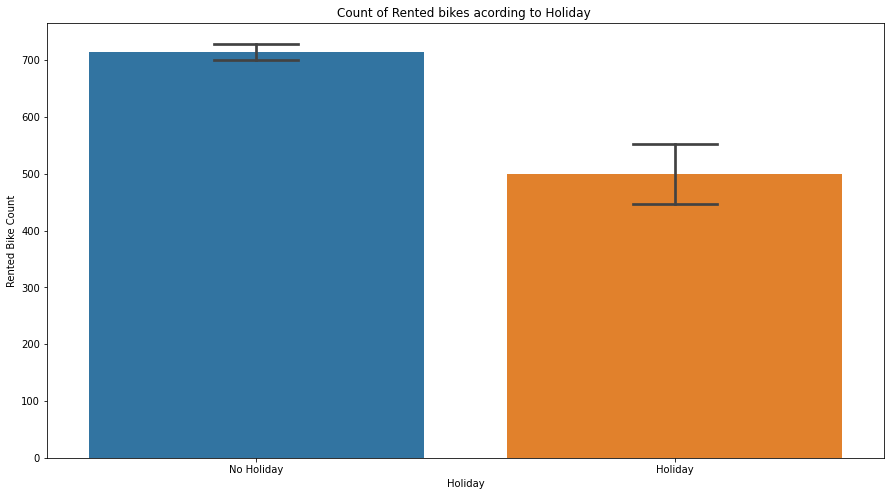

In [146]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [147]:
data.loc[data['Rainfall(mm)']>=4,'Rainfall(mm)']= 4
data.loc[data['Solar Radiation (MJ/m2)']>=2.5,'Solar Radiation (MJ/m2)']=2.5 
data.loc[data['Snowfall (cm)']>2,'Snowfall (cm)']= 2
data.loc[data['Wind speed (m/s)']>=4,'Wind speed (m/s)']= 4


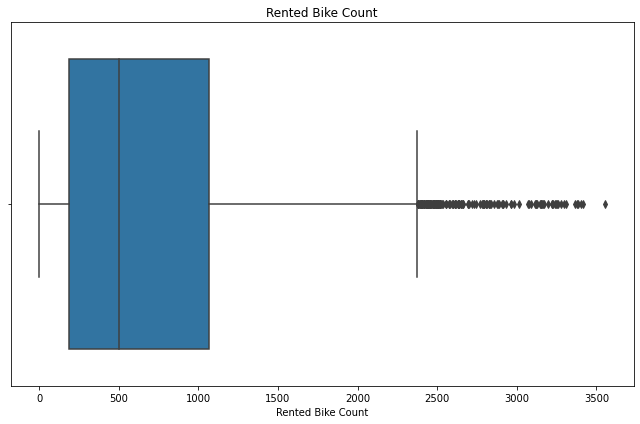

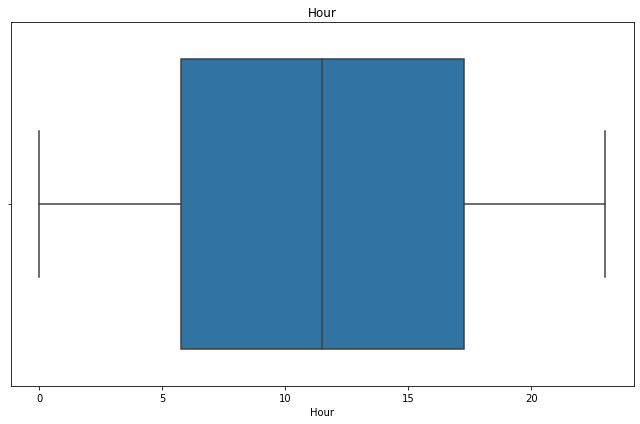

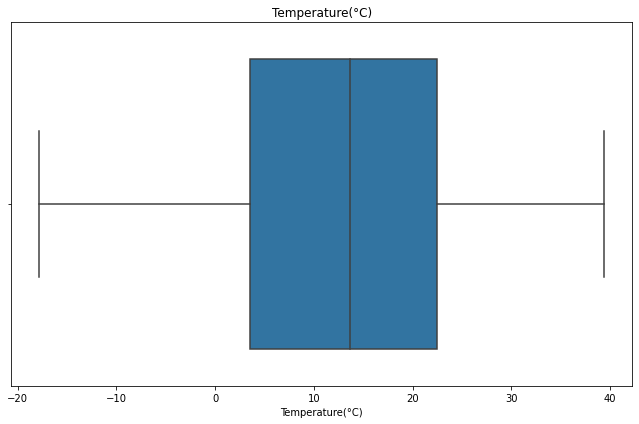

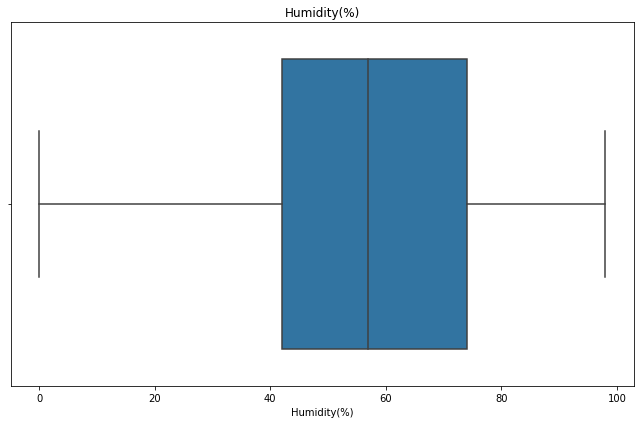

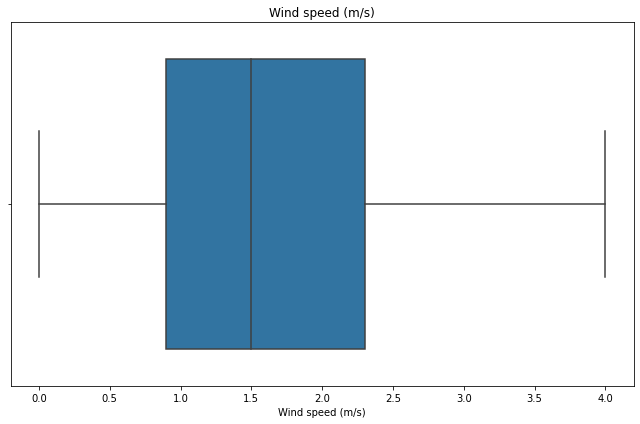

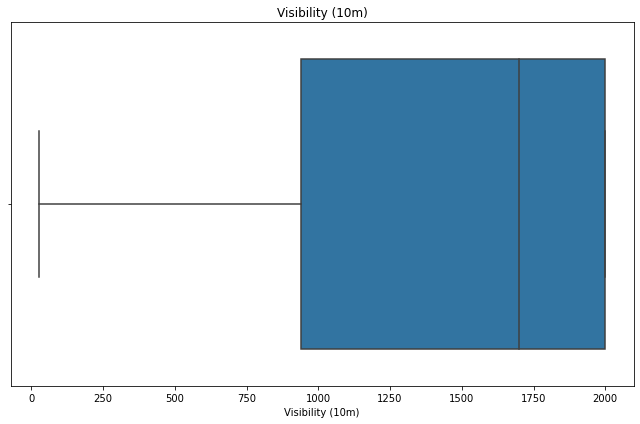

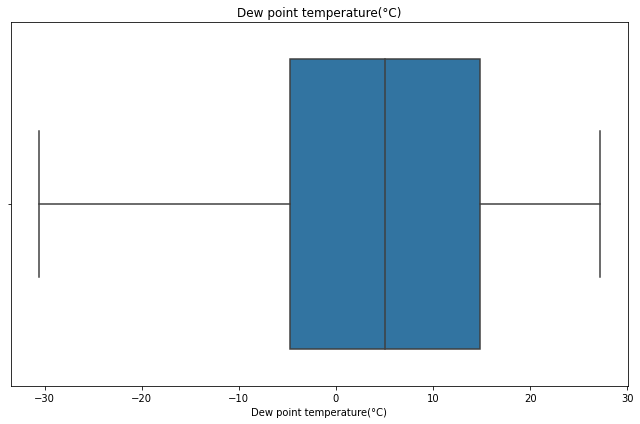

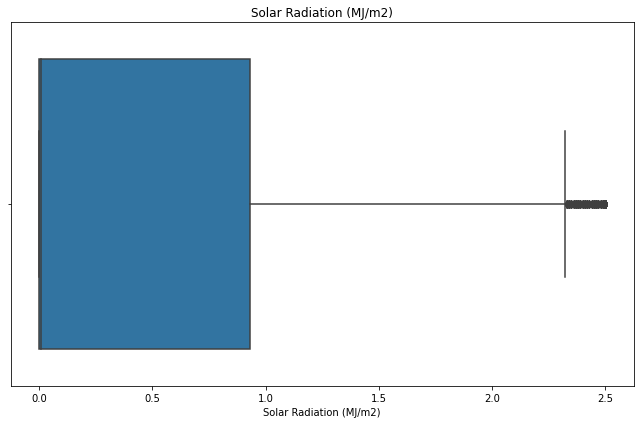

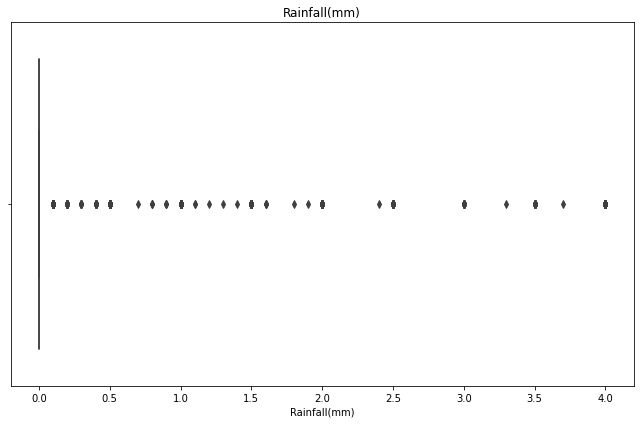

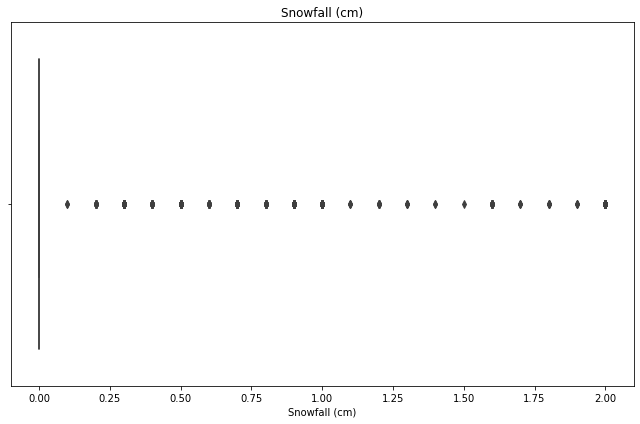

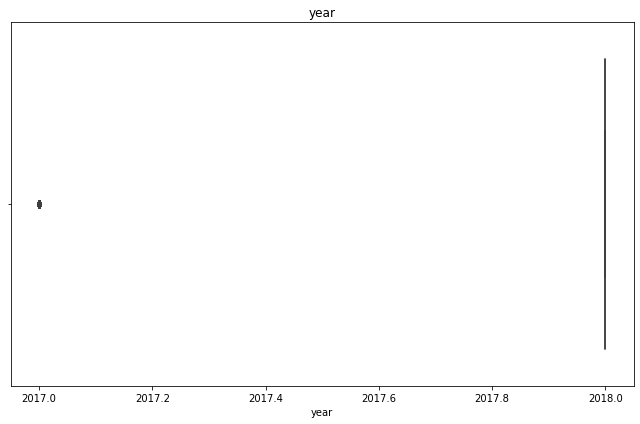

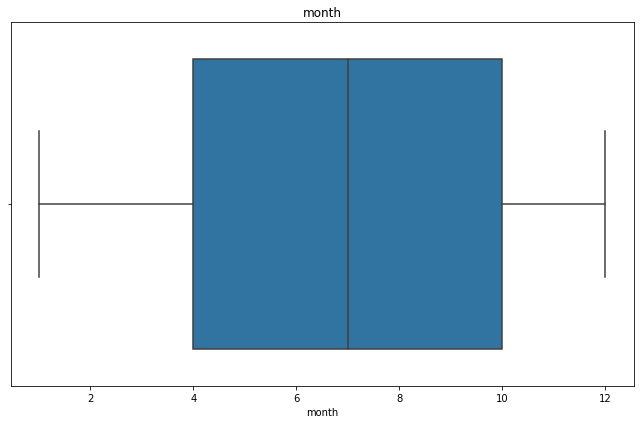

In [148]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=data[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

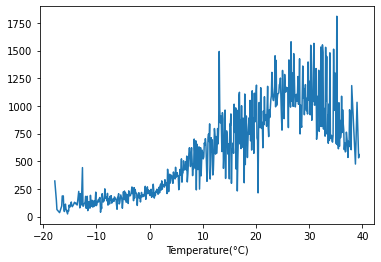

In [149]:
data.groupby('Temperature(°C)').median()['Rented Bike Count'].plot()

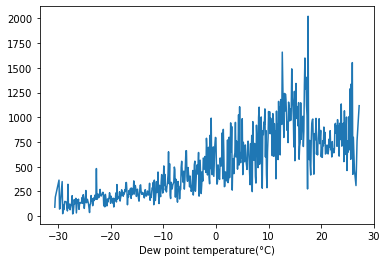

In [150]:
data.groupby('Dew point temperature(°C)').median()['Rented Bike Count'].plot()

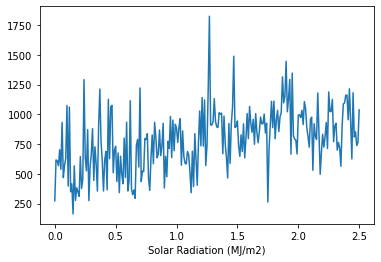

In [151]:
data.groupby('Solar Radiation (MJ/m2)').median()['Rented Bike Count'].plot()

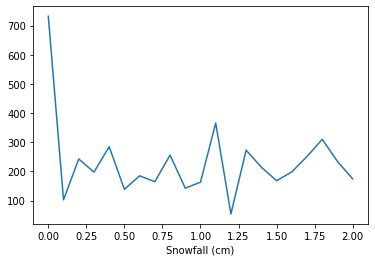

In [152]:
data.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

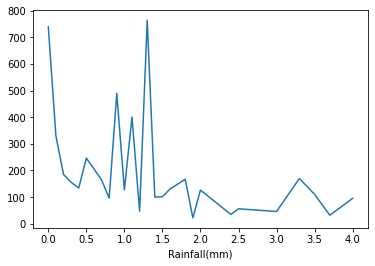

In [153]:
data.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

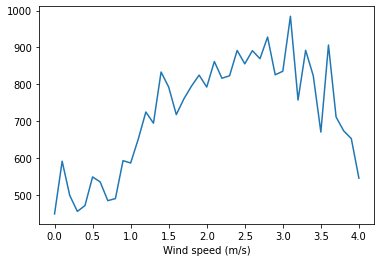

In [154]:
data.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


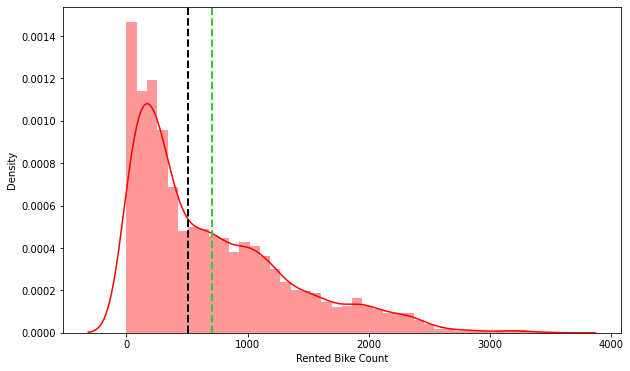

In [155]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(data['Rented Bike Count'],hist=True ,color="r")
ax.axvline(data['Rented Bike Count'].mean(), color='limegreen', linestyle='dashed', linewidth=2)
ax.axvline(data['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


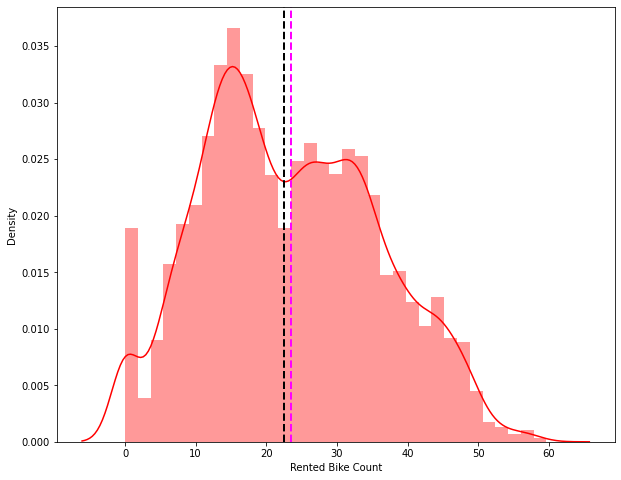

In [156]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(data['Rented Bike Count']), color="r")
ax.axvline(np.sqrt(data['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(data['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

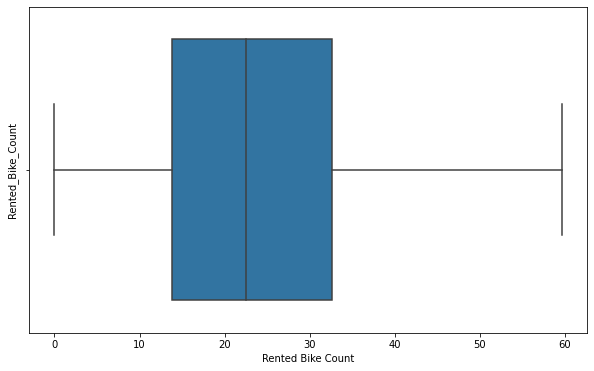

In [159]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(data['Rented Bike Count']))
plt.show()

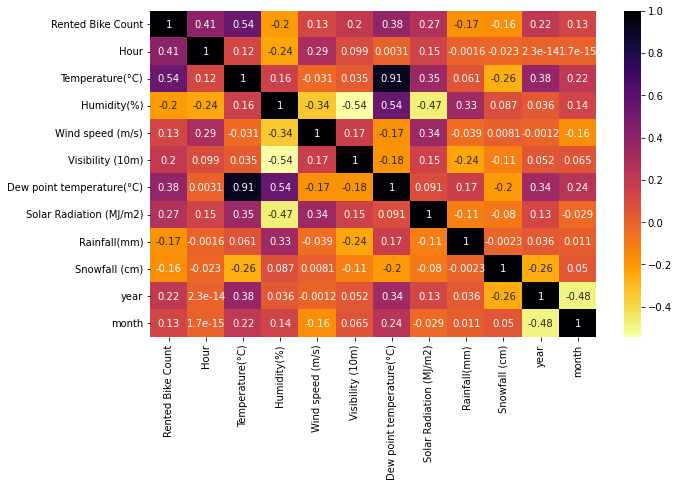

In [168]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='inferno_r',annot=True)